# А/В-тестирование. Проверка гипотез и принятие решений в интернет-магазине

**Описание проекта:**

В крупном интернет-магазине, совместно с отделом маркетинга был подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Задачи проекта:**

**Часть 1. Приоритизация гипотез**

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

**Часть 2. Анализ A/B-теста**

* Проанализировать A/B-тест:
  * Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
  * Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
  * Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
  * Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
  * Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
  * Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
  * Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
  * Построить точечный график стоимостей заказов. Сделать выводы и предположения.
  * Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
  * Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.
  * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
  * Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.
  * Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
  * Принять решение по результатам теста и объясните его. Варианты решений: 
    * 1. Остановить тест, зафиксировать победу одной из групп. 
    * 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    * 3. Продолжить тест.
  
**Описание данных:**

**Данные для первой части**

Таблица `hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**

Таблица `orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Таблица `visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Загрузка данных и подготовка к анализу

Импортируем нужные нам библиотеки.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
pd.set_option('display.max_colwidth', 300)

import warnings
warnings.filterwarnings('ignore')

Загружаем данные.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Поочередно посмотрим на данные, а также изучим общую информацию.

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Приведем названия столбцов в таблице `hypothesis` к нижнему регистру.

In [9]:
hypothesis.columns = hypothesis.columns.str.lower()

В таблицах `orders` и `visitors` столбцы с датами имеют тип данных `object`. Приведем их к корректному типу `datetime`.

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
# сразу проверим
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим одинаковы ли периоды исследования в таблицах `orders` и `visitors`.

In [11]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [12]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Рассматриваемые периоды совпадают. Проверим наличие дубликатов:

In [13]:
# в таблице гипотез
hypothesis[hypothesis.duplicated()]

,hypothesis,reach,impact,confidence,efforts


In [14]:
# в таблице заказов
orders[orders.duplicated()]

,transactionId,visitorId,date,revenue,group


In [15]:
# в таблице пользователей
visitors[visitors.duplicated()]

,date,group,visitors


Дубликаты не обнаружены.

Теперь проверим наличие пропусков:

In [16]:
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [17]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [18]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропуски также не обнаружены.

Проверим наличие пользователей, попавших одновременно в обе группы.

In [19]:
# сгруппируем данные по идентификаторам пользователей и агрегируем по уникальным значения группы
both_gr_check = orders.groupby('visitorId').agg({'group': 'nunique'}).query('group>1')
# оставим пользователей, попавших в обе группы
both_gr_check = both_gr_check.query('group > 1')
# посчитаем
both_gr_check['group'].count()

58

58 пользователей оказались в двух группах одновременно. Необходимо их убрать.

In [20]:
# создадим два фрейма с группой А и группой В
gr_A = orders[orders['group'] == 'A']
gr_B = orders[orders['group'] == 'B']
# создадим общий список с идентификаторами пользователей
two_gr_list = list(orders['visitorId'])
# и аналогично для каждой группы
gr_A_list = list(gr_A['visitorId'])
gr_B_list = list(gr_B['visitorId'])

# создадим пустой список и будем добавлять в него идентификаторы пользователей попавших в обе группы
all = []
for i in two_gr_list:
    if i in gr_A_list and i in gr_B_list:
        all.append(i)
# применим фильтр, чтобы отсеять "неугодных" нам пользователей
orders_new = orders[~orders['visitorId'].isin(all)]
# проводим проверку
both_gr_check = orders_new.groupby('visitorId').agg({'group': 'nunique'}).query('group>1')
both_gr_check['group'].count()

0

Фильтр сработал. Теперь можно не беспокоиться за чистоту последующего анализа.

**Вывод:**

Данные загруженны и предобработаныы. Что было сделано:
* Привели названия столбцов в таблице `hypothesis` к нижнему регистру.
* Привели тип данных столбцов с датами в таблицах `orders` и `visitors` к типу datetime.
* Проверили периоды исследования в таблицах `orders` и `visitors`. Все в порядке.
* Проверили таблицы на наличие дубликатов и пропусков. Ни первого, ни второго не обнаружено.
* Убрали из датафрейма 58 пользователей, попавших одновременно в обе исследуемые группы.

##  Приоритизация гипотез

**Фреймворк ICE**

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [21]:
hypothesis['ICE'] = ((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']).round(0)

In [22]:
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


**Фреймворк RICE**

Теперь применим фреймворк RICE для приоритизации гипотез. И также отсортируем их по убыванию приоритета.

In [23]:
hypothesis['RICE'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['efforts']).round(2)

In [24]:
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [25]:
hypothesis[['hypothesis', 'ICE', 'RICE']].style.background_gradient()

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.000000,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.000000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.000000,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.000000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.000000,16.200000


**Изменение приоритизации гипотез при применении RICE вместо ICE**

Наиболее перспективные гипотезы после применения фреймворка ICE:

* №8. Запустить акцию, дающую скидку на товар в день рождения 
* №0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 
* №7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 

Наиболее перспективные гипотезы после применения фреймворка RICE::

* №7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок 
* №2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 
* №0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 

При применении фреймворка RICE также учитывается параметр `Reach`- охват. В связи с этим считаю, что необходимо в первую очередь протестировать Гиппотезу №0 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

## Анализ A/B-теста

**Построение графика кумулятивной выручки по группам**

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders_new[['date','group']].drop_duplicates()

In [27]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Этот код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы `ordersAggregated`.

In [28]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина.

In [29]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [30]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [31]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [32]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [34]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


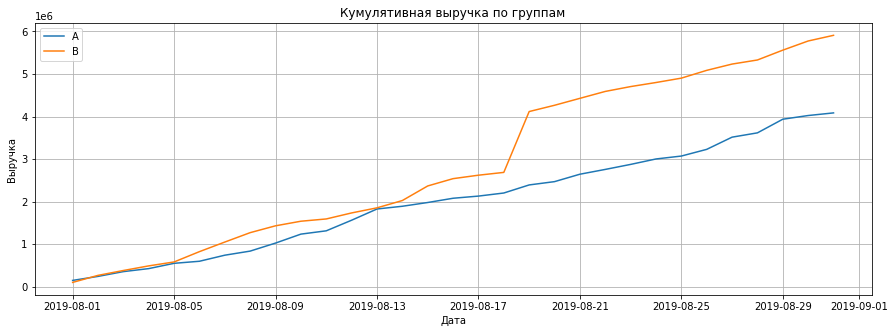

In [35]:
plt.figure(figsize=(15,5))

# строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

Кумулятивная выручка обеих групп равномерно увеличиваестя в течении всего исследуемого периода. Отдельно стоит обратить внимание на резкий скачок группы В, что может означать появление очень дорого заказа, либо же увеличение количества заказов.

**Построение графика кумулятивного среднего чека по группам**

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

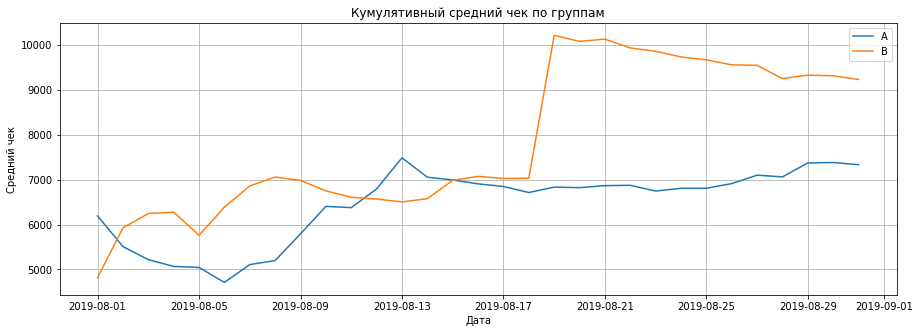

In [36]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend()
plt.show()

Кумулятивный средний чек к концу теста установился для группы А, но для группы В продолжает снижаться. Скорее всего это связано появлением крупных заказов в этой группе, поэтому потребуется немного больше времени для стабилизации среднего чека.

**Построение графика относительного изменения кумулятивного среднего чека группы B к группе A**

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):

In [37]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

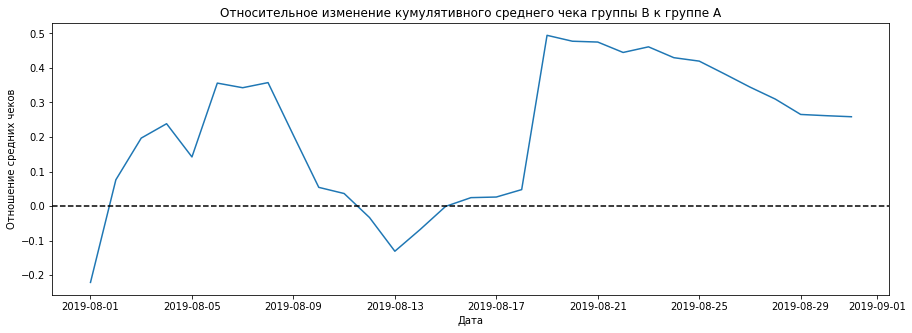

In [38]:
plt.figure(figsize=(15,5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.show()

График относительного изменения кумулятивного среднего чека нестабилен, имеются резкие перепады. Почти наверняка где-то спрятались крупные заказы и выбросы.

**Построение графика кумулятивной конверсии по группам**

Аналогично проанализируем график кумулятивной конверсии. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y. Для начала определим минимальную и максимальную даты.

In [39]:
display(mergedCumulativeRevenue['date'].min())
display(mergedCumulativeRevenue['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [40]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [41]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

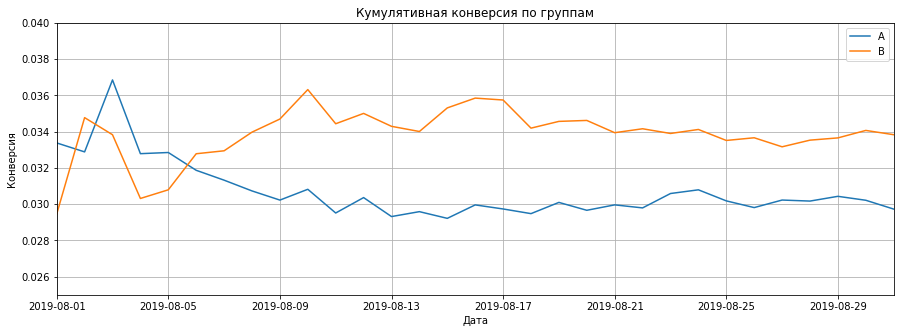

In [42]:
plt.figure(figsize=(15,5))

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

# задаем масштаб осей
plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), 0.025, 0.04])
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.legend()
plt.show()

В начале теста данные по кумулятивной конверсии обеих групп были примерно на равных значениях. Однако после 6 августа конверсия группы В выросла и зафиксировалась на значении 0.034. Группа А же наооборот опустилась до значения 0.03, где также зафиксировалась. 

**Построение графика относительного изменения кумулятивной конверсии группы B к группе A**

In [43]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


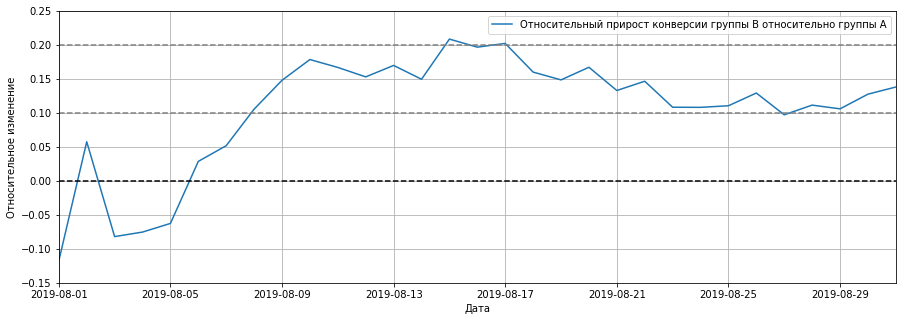

In [44]:
plt.figure(figsize=(15,5))

plt.plot(mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A")

# добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). 
plt.axhline(y=0, color='black', linestyle='--')
# и ещё две линии оси X серого цвета ('grey') со значением оси Y = 0.2 и Y = 0.1.
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.axis([datetime(2019, 8, 1), datetime(2019, 8, 31), - 0.15, 0.25])

plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()
plt.legend()
plt.show()

В начале теста группа B немного проигрывала группе A. Однако 6 августа вырвалась вперёд, вплоть до отметки в 20%, после чего начала постепенно снижаться до 10-13%. Пока что нельзя с полной уверенностью сказать, что конверсия зафиксировалась.

**Построение точечного графика количества заказов по пользователям**

Подсчитаем количество заказов по пользователям и посмотрим на результат.

In [45]:
ordersByUsers  = orders.drop(['group', 'revenue', 'date'], 
                             axis=1).groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values('orders')
ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


Изучим гистограмму распределения количества заказов.

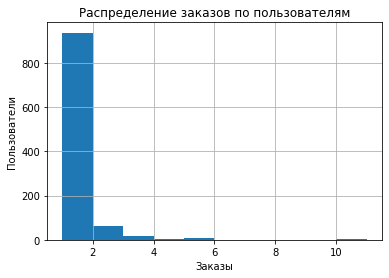

In [46]:
plt.hist(ordersByUsers['orders']) 

plt.title('Распределение заказов по пользователям')
plt.xlabel('Заказы')
plt.ylabel('Пользователи')
plt.grid()
plt.show()

Очевидно, что имеются пользователи, оформившие больше одного заказа. Однако определить сколько их проблематично. Оценим распределение заказов ещё одним способом.

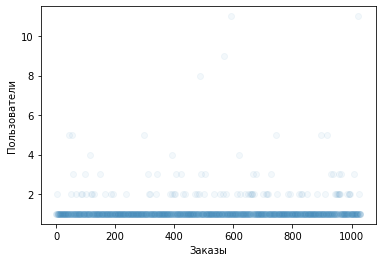

In [47]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.05)

plt.xlabel('Заказы')
plt.ylabel('Пользователи')
plt.show()

Имеется небольшое количество пользователей оформивших заказ более 2 раз. Они вполне могут быть аномальными.

**Расчет 95-го и 99-го перцентилей количества заказов на пользователя**

In [48]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Примем 99-й перцентиль количества заказов на пользователя, как аномальный уровень

In [49]:
# сохраним его в переменной anomaly_orders
anomaly_orders = np.percentile(ordersByUsers['orders'], [99])

Не более 5% пользователей совершали более 2 заказов, и не более 1% - больше 4 заказов

**Построение точечного графика стоимостей заказов**

Изучим гистограмму распределения стоимостей заказов.

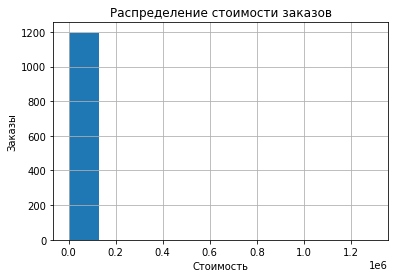

In [50]:
plt.hist(orders['revenue'])

plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость')
plt.ylabel('Заказы')
plt.grid()
plt.show()

На графике не видно заказов стоимостью больше 200 тыс. рублей. Нужно оценить стоимость заказов ещё одним способом.

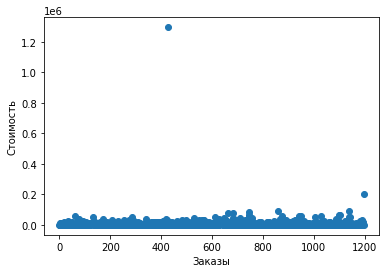

In [51]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

Видим очень серьезный выброс (больше  1.2 млн. рублей за заказ) и более скромный - в районе 200 тыс. рублей). Построим еще один график, ограничим его по оси `y` до 150 тыс. рублей.

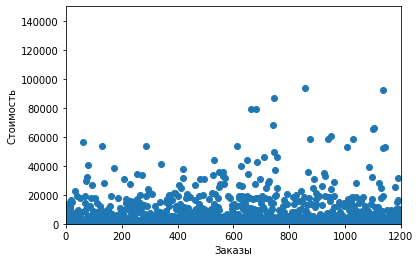

In [52]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.axis([0, 1200, 0, 150000])
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.show()

Так же видим выбросы в районе 35-100 тыс. рублей. Основная масса заказов распределена до 20 тыс. рублей. 

**Расчет 95-го и 99-го перцентилей стоимости заказов**

In [53]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Примем 95-й перцентиль стоимости заказа, как аномальный уровень

In [54]:
# сохраним его в переменной anomaly_revenue
anomaly_revenue = np.percentile(orders['revenue'], [95])

Не более, чем у 5% заказов чек больше 28 000 рублей. И не больше, чем у 1%  больше 58 233.2 рублей.

**Расчет статистической значимости различий в конверсии между группами по «сырым» данным**

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. 

* Нулевая H0: различия в конверсиях между группами по «сырым» данным статистически не значимы.

* Альтернативная H1: различия в конверсиях между группами по «сырым» данным статистически значимы.

In [55]:
# получаем агрегированные по дням данные о посетителях группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [56]:
# получаем кумулятивные по дням данные о посетителях группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [57]:
# получаем агрегированные кумулятивные по дням данные о посетителях группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [58]:
# получаем кумулятивные по дням данные о посетителях группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [59]:
# получаем агрегированные по дням данные о заказах и выручке группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [60]:
# получаем кумулятивные по дням данные о заказах и выручке группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [61]:
# получаем агрегированные по дням данные о заказах и выручке группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [62]:
# получаем кумулятивные по дням данные о заказах и выручке группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [63]:
# объединяем по дате все полученные кумулятивные данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [64]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [65]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [66]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [67]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Пороговое значение alpha примем за 5%.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [68]:
print("{0:e}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

1.679236e-02
0.138


* Первое число — `p-value` = 1.679236e-02, что значиительно меньше 5e-02, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. 
* Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.

**Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным**

Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

Сформулируем гипотезы. 

* Нулевая H0: различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы.

* Альтернативная H1: различия в среднем чеке заказа между группами по «сырым» данным статистически значимы.

In [69]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


* `P-value` больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.
* При этом относительное различие среднего чека между сегментами равно 25.9%, что противоречит первому выводу. Думаю это связано с отдельными аномальными заказами в группе В. Нужно проверить.

In [70]:
orders.sort_values('revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Действительно два аномально больших заказа оказались в группе В. Однако нас это не должно смущать, т.к. метод «U-критерий Манна-Уитни» работает с рангами — номерами значений в упорядоченном ряду, никак не учитывая сами значения. 

**Расчет статистической значимости различий в конверсии между группами по «очищенным» данным**

95-й и 99-й перцентили средних чеков равны 28 000  и 58 233.2 рублям.

95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам на пользователя.

Примем за аномальных пользователей тех, кто совершил более 4 заказов или совершил заказ на сумму свыше 28 000 рублей.

Сделаем срезы пользователей с числом заказов больше 4 — `usersWithManyOrders`и пользователей, совершивших заказы дороже 28 000 рублей — `usersWithExpensiveOrders`.

In [71]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)

In [72]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

Объединим их в таблице `abnormalUsers`.

In [73]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())

# также посчитаем общее количество аномальных пользователей
print(abnormalUsers.shape[0]) 

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64
59


На выходе получили 59  аномальных пользователей.

Сформулируем гипотезы. 

* Нулевая H0: различия в конверсии между группами по «очищенным» данным статистически не значимы.

* Альтернативная H1: различия в конверсии заказа между группами по «очищенным» данным статистически значимы.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста. Сохраним их в переменных `sampleAFiltered` и `sampleBFiltered `.

In [74]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [75]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Пороговое значение alpha примем за 5%.

In [76]:
print('{0:e}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

1.845708e-02
0.145


* Как и в случае с "сырыми данными" `P-value` оказался меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "очищенных" данных сообщает, что в конверсии между группами по прежнему есть статистически значимые различия.
* Относительный прирост конверсии очищенной группы B к конверсии группы А увеличился на 0.7 процентных пунктов и равен 14.5%.

In [77]:
f'{(0.145 - 0.138) / 0.138:.1%}'

'5.1%'

**Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным**

Сформулируем гипотезы. 

* Нулевая H0: различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы.

* Альтернативная H1: различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы.

Пороговое значение alpha примем за 5%.

In [78]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.961
-0.014


* После очистки данных от аномалий `P-value` по-прежнему больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, также нет.
* Относительное различие среднего чека между сегментами равно 1.4%, но теперь уже в пользу группы А.

**Вывод:**
* Кумулятивная выручка обеих групп равномерно увеличиваестя в течении всего исследуемого периода. Отдельно стоит обратить внимание на резкий скачок группы В, что может означать появление очень дорого заказа, либо же увеличение количества заказов.
* Кумулятивный средний чек к концу теста установился для группы А, но для группы В продолжает снижаться. Скорее всего это связано появлением крупных заказов в этой группе, поэтому потребуется немного больше времени для стабилизации среднего чека.
* График относительного изменения кумулятивного среднего чека нестабилен, имеются резкие перепады. Почти наверняка где-то спрятались крупные заказы и выбросы.
* В начале теста данные по кумулятивной конверсии обеих групп были примерно на равных значениях. Однако после 6 августа конверсия группы В выросла и зафиксировалась на значении 0.034. Группа А же наооборот опустилась до значения 0.03, где также зафиксировалась. 
* В начале теста группа B немного проигрывала группе A. Однако 6 августа вырвалась вперёд, вплоть до отметки в 20%, после чего начала постепенно снижаться до 10-13%. Пока что нельзя с полной уверенностью сказать, что конверсия зафиксировалась.
* Не более 5% пользователей совершали более 2 заказов, и не более 1% - больше 4 заказов
* Не более, чем у 5% заказов чек больше 28 000 рублей. И не больше, чем у 1%  больше 58 233.2 рублей.
* Анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.
* Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом относительное различие среднего чека между сегментами равно 25.9% из-за отдельных аномальных заказов в группе В. 
* Анализ "очищенных" данных сообщает, что в конверсии между группами по прежнему есть статистически значимые различия.
* Относительный прирост конверсии очищенной группы B к конверсии группы А увеличился на 0.7 процентных пунктов и равен 14.5%.
* Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, также нет. Относительное различие среднего чека между сегментами равно 1.4%, но теперь уже в пользу группы А.

**Решение по результатам теста**

По результатам теста имеем следующие факты:

* Есть статистически значимое различие по конверсии между группами. Как по «сырым» данным , так и по данным после фильтрации аномалий. 
* После фильтрации, относительный прирост конверсии группы В к конверсии группы А повысился с 13.8% до 14.5%.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым» данным, ни по данным после фильтрации аномалий.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, ввиду того, что значения кумулятивных метрик к концу теста были практически стабилизированы.

При этом группу В можно считать лучше группы А, так как даже при одинаковом среднем чеке, конверсия выросла. А значит выросла и выручка, что для бизнеса играет ключевую роль.

## Общий вывод

**Что было сделано:**

1\. Загрузка данных и подготовка к анализу.

* Привели названия столбцов в таблице `hypothesis` к нижнему регистру.
* Привели тип данных столбцов с датами в таблицах `orders` и `visitors` к типу datetime.
* Проверили периоды исследования в таблицах `orders` и `visitors`. Все в порядке.
* Проверили таблицы на наличие дубликатов и пропусков. Ни первого, ни второго не обнаружено.
* Убрали из датафрейма 58 пользователей, попавших одновременно в обе исследуемые группы.

2\. Приоритизация гипотез.

Самая перспективная гипотеза после применения фреймворка ICE:
* №8. Запустить акцию, дающую скидку на товар в день рождения.

При применении фреймворка RICE также учитывается параметр `Reach`- охват. В связи с этим принято решение - в первую очередь протестировать гиппотезу:
* №0 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

3\. Анализ А/В-теста.

* Кумулятивная выручка обеих групп равномерно увеличиваестя в течении всего исследуемого периода. Отдельно стоит обратить внимание на резкий скачок группы В, что может означать появление очень дорого заказа, либо же увеличение количества заказов.
* Кумулятивный средний чек к концу теста установился для группы А, но для группы В продолжает снижаться. Скорее всего это связано появлением крупных заказов в этой группе, поэтому потребуется немного больше времени для стабилизации среднего чека.
* График относительного изменения кумулятивного среднего чека нестабилен, имеются резкие перепады. Почти наверняка где-то спрятались крупные заказы и выбросы.
* В начале теста данные по кумулятивной конверсии обеих групп были примерно на равных значениях. Однако после 6 августа конверсия группы В выросла и зафиксировалась на значении 0.034. Группа А же наооборот опустилась до значения 0.03, где также зафиксировалась. 
* В начале теста группа B немного проигрывала группе A. Однако 6 августа вырвалась вперёд, вплоть до отметки в 20%, после чего начала постепенно снижаться до 10-13%. Пока что нельзя с полной уверенностью сказать, что конверсия зафиксировалась.
* Не более 5% пользователей совершали более 2 заказов, и не более 1% - больше 4 заказов
* Не более, чем у 5% заказов чек больше 28 000 рублей. И не больше, чем у 1%  больше 58 233.2 рублей.
* Анализ "сырых" данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%.
* Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом относительное различие среднего чека между сегментами равно 25.9% из-за отдельных аномальных заказов в группе В. 
* Анализ "очищенных" данных сообщает, что в конверсии между группами по прежнему есть статистически значимые различия.
* Относительный прирост конверсии очищенной группы B к конверсии группы А увеличился на 0.7 процентных пунктов и равен 14.5%.
* Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, также нет. Относительное различие среднего чека между сегментами равно 1.4%, но теперь уже в пользу группы А.

4\. Решение по результатам теста.

По результатам теста имеем следующие факты:

* Есть статистически значимое различие по конверсии между группами. Как по «сырым» данным , так и по данным после фильтрации аномалий. 
* После фильтрации, относительный прирост конверсии группы В к конверсии группы А повысился с 13.8% до 14.5%.
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым» данным, ни по данным после фильтрации аномалий.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, ввиду того, что значения кумулятивных метрик к концу теста были практически стабилизированы.

При этом группу В можно считать лучше группы А, так как даже при одинаковом среднем чеке, конверсия выросла. А значит выросла и выручка, что для бизнеса играет ключевую роль.